In [85]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

### Step 1 : Reading and understanding the data

In [2]:
df_housing=pd.read_csv("train.csv")
df_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df_housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df_housing.shape

(1460, 81)

### Step 2: Data imputation and Handling missing data

In [6]:
df_housing.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
round(df_housing.isnull().sum()/len(df_housing)*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

 out of 81 fetures the following 4 fetures have more than 80% missing values
 - Alley (93.77% missing values)
 - PoolQC (99.52% missing values)
 - Fence (80.75% missing values)
 - MiscFeature (96.30 missing values)
 and 1 feature has close to 50% missing value
 - FireplaceQu (47.26% missing values)
 
 We can drop these features

In [8]:
df_housing.drop(columns=['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],inplace=True)

In [9]:
df_housing.shape

(1460, 76)

After dropping the columns that has more missing values, there are features which contains missing values that needs to imputed before proceeding further. The features that needs to be imputed are as follow
- LotFrontage       (17.74% missing values)
- MasVnrType        (0.55% missing values)
- MasVnrArea        (0.55% missing values)
- BsmtCond          (2.53% missing values)
- BsmtExposure      (2.60% missing values)
- BsmtFinType1      (2.53% missing values)
- BsmtQual          (2.53% missing values)
- BsmtCond          (2.53% missing values)
- BsmtExposure      (2.60% missing values)
- BsmtFinType1      (2.53% missing values)
- BsmtFinType2      (2.60% missing values)
- Electrical        (0.07% missing values)
- GarageType        (5.55% missing values)
- GarageYrBlt       (5.55% missing values)
- GarageFinish      (5.55% missing values)
- GarageQual        (5.55% missing values)
- GarageCond        (5.55% missing values)

#### Before handling the missing data let us check for categorical and numerical features

In [10]:
categorical_columns = list(df_housing.select_dtypes(include=['object']).columns)

In [11]:
categorical_columns.append('MSSubClass')

##### Now check for the categorical features that are biased towards one category
- Drop the feature if it is >=80% biased towards one class

In [12]:
# list the categorical columns with the percentage of each class
for column in df_housing.columns:
    if df_housing[column].dtype == np.object :
        print(column)
        print(df_housing[column].value_counts(normalize=True))

MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64
Neighborhood
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.

#### Drop features that has 80% or more biased towards a single class and the columns that doesn't serve any purpose for the prediction

In [13]:
drop_col =['Id','MSZoning','LandContour','Utilities','LandSlope','Condition1','Condition2','BldgType','RoofMatl','ExterCond',
           'BsmtCond','BsmtFinType2','Heating','Electrical','Functional','GarageQual','GarageCond','PavedDrive','SaleType',
          'SaleCondition','Street']
df_housing.drop(columns=drop_col,inplace=True)

In [14]:
df_housing.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig',
       'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [15]:
categorical_columns = list(df_housing.select_dtypes(include=['object']).columns)

In [16]:
categorical_columns.append('MSSubClass')

In [17]:
categorical_columns

['LotShape',
 'LotConfig',
 'Neighborhood',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'GarageType',
 'GarageFinish',
 'MSSubClass']

#### Impute the missing values for Categorical features

In [18]:
df_housing.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
LotShape           0
LotConfig          0
Neighborhood       0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
Foundation         0
BsmtQual          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
HeatingQC          0
CentralAir         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Fireplaces         0
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch

In [19]:
df_housing['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [20]:
# Fill the missing values with the category that represents No for each categorical feature
df_housing['BsmtQual']=df_housing['BsmtQual'].fillna('No')
df_housing['BsmtExposure']=df_housing['BsmtExposure'].fillna('No')
df_housing['BsmtFinType1']=df_housing['BsmtFinType1'].fillna('NA')
df_housing['MasVnrType']=df_housing['MasVnrType'].fillna('None')
df_housing['GarageType']=df_housing['GarageType'].fillna('NA')
df_housing['GarageFinish']=df_housing['GarageFinish'].fillna('NA')

#### Impute the missing values for Numerical features
Here is the list of numerical features that has missing values
- LotFrontage
- GarageYrBlt
- MasVnrArea


In [21]:
# let us find the outliers for the numerical features before starting the imputation.This will help us to determine 
#the value to be used for imputation(like mean,median or mode)
df_housing.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [22]:
df_housing.LotFrontage.value_counts(normalize=True)

60.0     0.119067
70.0     0.058285
80.0     0.057452
50.0     0.047460
75.0     0.044130
65.0     0.036636
85.0     0.033306
78.0     0.020816
21.0     0.019151
90.0     0.019151
68.0     0.015820
64.0     0.015820
24.0     0.015820
73.0     0.014988
55.0     0.014155
63.0     0.014155
79.0     0.014155
72.0     0.014155
100.0    0.013322
66.0     0.012490
74.0     0.012490
51.0     0.012490
52.0     0.011657
59.0     0.010824
82.0     0.009992
71.0     0.009992
67.0     0.009992
43.0     0.009992
40.0     0.009992
57.0     0.009992
76.0     0.009159
69.0     0.009159
92.0     0.008326
34.0     0.008326
53.0     0.008326
86.0     0.008326
88.0     0.008326
84.0     0.007494
35.0     0.007494
62.0     0.007494
44.0     0.007494
77.0     0.007494
93.0     0.006661
98.0     0.006661
96.0     0.006661
61.0     0.006661
95.0     0.005828
58.0     0.005828
120.0    0.005828
107.0    0.005828
94.0     0.004996
81.0     0.004996
36.0     0.004996
30.0     0.004996
48.0     0.004996
91.0     0

In [23]:
#using IQR to find the outliers
# IQR = Q3-Q1
IQR = 80-59
print("IQR:",IQR)
# calcualte the lower boud
lower_bound = 59 - 1.5*IQR
upper_bound = 80 - 1.5*IQR
print("lower bound:",lower_bound)
print("upper bound:",upper_bound)

IQR: 21
lower bound: 27.5
upper bound: 48.5


##### The values below the lower bound 27.5 and the values above upper bound 48.5 can be considered as outliers for the feature LotFrontage and we can use mode vaule to impute

In [24]:
df_housing['LotFrontage']=df_housing['LotFrontage'].fillna(df_housing['LotFrontage'].median())

In [25]:
df_housing.GarageYrBlt.describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [26]:
df_housing.GarageYrBlt.isnull().sum()

81

In [27]:
# calculate IQR
IQR=2002 - 1961
lower_bound = 1961 - 1.5*IQR
upper_bound = 2002 - 1.5*IQR
print("IQR:",IQR)
print("lower bound:",lower_bound)
print("upper bound:",upper_bound)

IQR: 41
lower bound: 1899.5
upper bound: 1940.5


In [28]:
# for the feature GarageYrBlt there are more values above the upper bound, and less missing values. Better to use 0 instead of using
#median,mean or mode to impute the missing values.Here 0 represents No Garage
df_housing['GarageYrBlt']=df_housing['GarageYrBlt'].fillna(0)

In [29]:
df_housing.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [30]:
df_housing['MasVnrArea']=df_housing['MasVnrArea'].fillna(0)

In [31]:
df_housing.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
LotShape         0
LotConfig        0
Neighborhood     0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold      

#### Encode the categorical features

In [32]:
print(categorical_columns)

['LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'CentralAir', 'KitchenQual', 'GarageType', 'GarageFinish', 'MSSubClass']


In [33]:
df_housing.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [34]:
def create_dummy_variable(data,column):
    return pd.get_dummies(data[column],drop_first=True, prefix=column)


In [35]:
#encode all the categorical feature by creating dummy variables
for column in categorical_columns:
    df_housing=pd.concat([df_housing,create_dummy_variable(df_housing,column)],axis=1)

In [36]:
#now we have encoded all the categorical variables, we can drop the original categorical features
df_housing.drop(columns=categorical_columns,inplace=True)

In [37]:
df_housing.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0

In [38]:
df_housing[['YearBuilt','YrSold']]

,YearBuilt,YrSold
0,2003,2008
1,1976,2007
2,2001,2008
3,1915,2006
4,2000,2008
5,1993,2009
6,2004,2007
7,1973,2009
8,1931,2008
9,1939,2008


#### Feature Engineering
- we can create a new feature AgeOfbuiling by using yearBuilt and YrSold features

In [39]:
df_housing['AgeOfBuilding']=df_housing['YrSold']-df_housing['YearBuilt']

In [40]:
#now we can drop YrSold and YearBuilt features
df_housing.drop(columns=['YrSold','YearBuilt'],inplace=True)

In [41]:
df_housing.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,AgeOfBuilding
0,65.0,8450,7,5,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,208500,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5
1,80.0,9600,6,8,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,181500,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31
2,68.0,11250,7,5,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,223500,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7
3,60.0,9550,7,5,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,140000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1

In [42]:
df_housing.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,AgeOfBuilding
0,65.0,8450,7,5,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,208500,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5
1,80.0,9600,6,8,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,181500,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31
2,68.0,11250,7,5,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,223500,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7
3,60.0,9550,7,5,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,140000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1

### Step 3: EDA
- Analayse the correlation between our target variable and the features
- Explore the distirbution of the features
- check for Outliers

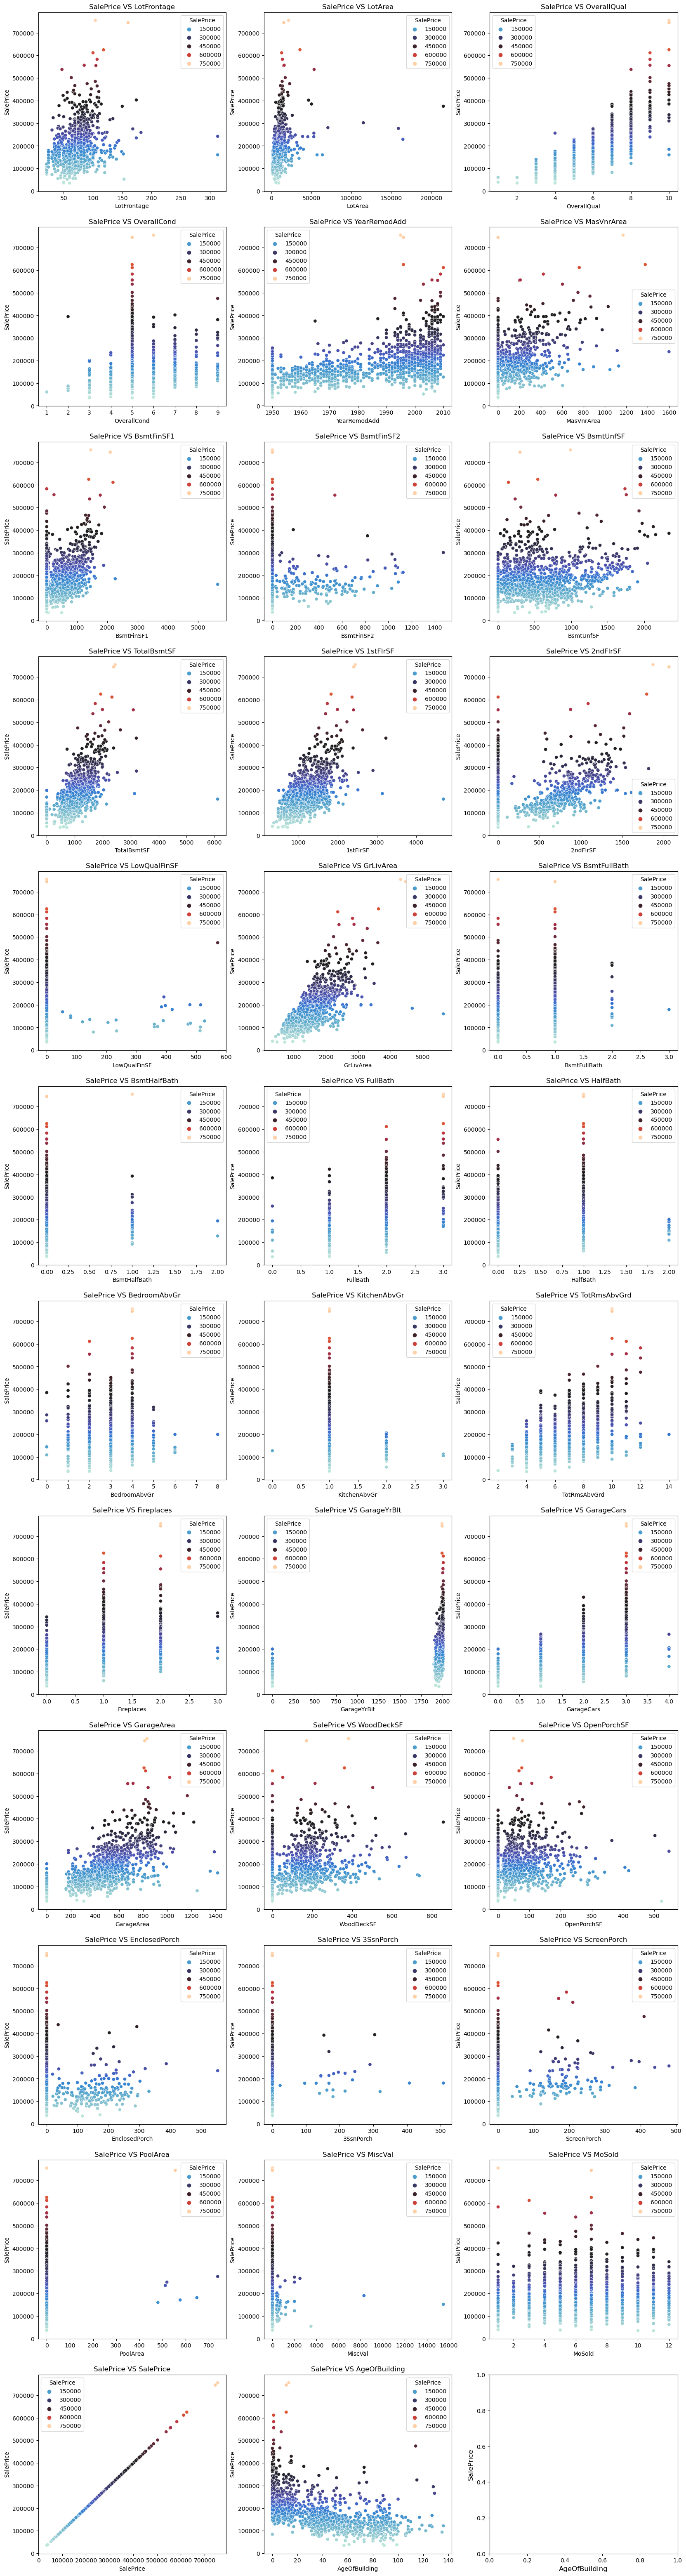

In [43]:
#Visualising numerical predictor variables with Target Variables
df_num = df_housing.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(12,3,figsize=(20,80))
for i,ax in zip(df_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=df_num,ax=ax,palette='icefire')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' VS '+str(i))

Observations from the above plot:-

- New properties are costlier than older properties.
- GRLiving Area has a direct corelation with the price of the property.
- Total basement area, which is linearly related with the total living area, also is directly proportional to the price of the property.
- Month sold has no effect on the price.

#### Prepare the data for training and testing the model

In [44]:
data_train,data_test = train_test_split(df_housing,train_size=0.70,random_state=100)

In [45]:
data_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,AgeOfBuilding
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.00

#### Standardizing the features
- before builing the model , let us standardize the dataset to make all the features have standard scale and contributes equally in the learning of our model

In [46]:
scaler = StandardScaler()

In [47]:
numerical_columns=['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea'
            , 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'TotalBsmtSF'
           ,'1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'
            , 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces'
           , 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
           , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'AgeOfBuilding']

In [48]:
data_train[numerical_columns] = scaler.fit_transform(data_train[numerical_columns])
data_test[numerical_columns] = scaler.fit_transform(data_test[numerical_columns])

In [49]:
data_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,AgeOfBuilding
318,0.925326,-0.057261,0.648310,-0.532073,0.389207,0.809137,1.159065,-0.293313,-0.454262,0.621091,0.511410,2.137583,-0.124502,2.121655,1.066863,-0.247791,0.784821,1.244440,1.395790,-0.234155,1.555150,0.622148,0.274068,1.646935,0.867501,1.988123,0.195951,1.912645,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,260000,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-0.675791
239,-0.795709,-0.169753,-0.066511,-1.448170,-1.698692,-0.558025,-0.761831,-0.293313,0.172244,-0.712611,-0.931882,0.793638,-0.124502,-0.058599,-0.837450,-0.247791,-1.028080,1.244440,0.175669,-0.234155,0.308833,0.622148,0.177351,-1.034916,-1.188045,-0.744598,1.405086,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,113000,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.939707
986,-0.478677,-0.502762,-0.066511,2.216221,0.874765,-0.558025,-0.964030,-0.293313,-0.175567,-1.257424,-0.421449,0.667284,-0.124502,0.219811,-0.837450,-0.247791,-1.028080,-0.753316,-1.044452,-0.234155,-0.937484,-0.927153,

In [50]:
y_train = data_train.pop('SalePrice')
X_train = data_train
y_test = data_test.pop('SalePrice')
x_test= data_test

In [51]:
X_train.shape

(1021, 161)

### Step 4: Build the model

#### Recursive Feature Elimintaion

In [53]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=25)
rfe = rfe.fit(X_train,y_train)

In [54]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 56),
 ('LotArea', False, 78),
 ('OverallQual', True, 1),
 ('OverallCond', False, 61),
 ('YearRemodAdd', False, 120),
 ('MasVnrArea', False, 124),
 ('BsmtFinSF1', False, 11),
 ('BsmtFinSF2', False, 12),
 ('BsmtUnfSF', False, 9),
 ('TotalBsmtSF', False, 8),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 10),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 64),
 ('BsmtHalfBath', False, 125),
 ('FullBath', False, 113),
 ('HalfBath', False, 105),
 ('BedroomAbvGr', False, 121),
 ('KitchenAbvGr', False, 39),
 ('TotRmsAbvGrd', False, 118),
 ('Fireplaces', False, 103),
 ('GarageYrBlt', False, 54),
 ('GarageCars', False, 36),
 ('GarageArea', False, 47),
 ('WoodDeckSF', False, 126),
 ('OpenPorchSF', False, 117),
 ('EnclosedPorch', False, 133),
 ('3SsnPorch', False, 134),
 ('ScreenPorch', False, 110),
 ('PoolArea', False, 119),
 ('MiscVal', False, 137),
 ('MoSold', False, 135),
 ('LotShape_IR2', False, 132),
 ('LotShape_IR3', True, 1),
 ('LotShap

In [55]:
# select the features from rfe
features = X_train.columns[rfe.support_]

In [56]:
X_train_rfe = X_train[features]
#adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)
#create a RFE model
lm = sm.OLS(y_train,X_train_rfe).fit()
#Get the Summary of Linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     204.2
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:40:36   Log-Likelihood:                -12056.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     996   BIC:                         2.428e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.307e+05   7528.221     30.639      0.000    2.16e+05    2.45e+05
OverallQual           1.885e+04   1854.942     10.162      0.000    1.52e+04    2.25e+04
1stFlrSF              3.469e+04   8790.475      3.946      0.000    1.74e+04    5.19e+04
2ndFlrSF              3.279e+04   9597.852      3.416      0.001     1.4e+04    5.16e+04
GrLivArea            -1.598e+04   1.15e+04     -1.386      0.166   -3.86e+04    6650.211
LotShape_IR3          -2.15e+04   1.13e+04     -1.910      0.056   -4.36e+04     587.244
Neighborhood_NoRidge  6.657e+04   6373.673     10.445      0.000    5.41e+04    7.91e+04
Neighborhood_NridgHt  3.271e+04   5459.511      5.991      0.000     2.2e+04    4.34e+04
Neighborhood_Somerst  2.743e+04   5022.273      5.462      0.000    1.76e+04    3.73e+04
Neighborhood_StoneBr  2.677e+04   9553.792      2.802      0.005    8026.114    4.55e+04
Exterior1st_AsphShn  -2.393e+04   3.37e+04     -0.710      0.478   -9.01e+04    4.22e+04
Exterior1st_BrkFace   2.381e+04   6333.348      3.760      0.000    1.14e+04    3.62e+04
Exterior1st_ImStucc  -4.102e+04   3.57e+04     -1.149      0.251   -1.11e+05     2.9e+04
Exterior2nd_ImStucc   1.817e+04   1.26e+04      1.443      0.149   -6547.376    4.29e+04
Exterior2nd_Stucco   -1.852e+04   7707.533     -2.403      0.016   -3.36e+04   -3395.857
BsmtQual_Fa          -5.463e+04   8557.397     -6.384      0.000   -7.14e+04   -3.78e+04
BsmtQual_Gd          -3.803e+04   4781.812     -7.954      0.000   -4.74e+04   -2.87e+04
BsmtQual_No          -3.091e+04   4304.952     -7.180      0.000   -3.94e+04   -2.25e+04
BsmtQual_TA          -4.912e+04   5424.240     -9.056      0.000   -5.98e+04   -3.85e+04
BsmtExposure_Gd       2.961e+04   3735.552      7.926      0.000    2.23e+04    3.69e+04
BsmtFinType1_NA      -3.091e+04   4304.952     -7.180      0.000   -3.94e+04   -2.25e+04
CentralAir_Y          1.963e+04   4562.720      4.303      0.000    1.07e+04    2.86e+04
KitchenQual_Fa       -4.718e+04   8935.757     -5.280      0.000   -6.47e+04   -2.96e+04
KitchenQual_Gd       -3.034e+04   5255.458     -5.773      0.000   -4.07e+04      -2e+04
KitchenQual_TA       -4.312e+04   5838.794     -7.385      0.000   -5.46e+04   -3.17e+04
MSSubClass_160       -3.488e+04   5511.466     -6.329      0.000   -4.57e+04   -2.41e+04
==============================================================================
Omnibus:                      478.651   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32403.963
Skew:                          -1.293   Prob(JB):                         0.00
Kurtosis:                      30.478   Cond. No.                     1.28e+16
==============================================================================

Notes:
[1] Standard Errors 

In [57]:
# calculate VIF
def calculate_vif(data):
    vif = pd.DataFrame()
    vif['Features'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF',ascending=False)
    return vif

In [58]:
def rebuild_model(data,y_train):
    X_train_lm = sm.add_constant(data)
    lm = sm.OLS(y_train,X_train_lm).fit()
    return lm

In [59]:
def drop_feature(column_name,data):
    train_new = data.drop([column_name],axis=1)
    return train_new
    

In [60]:
#check VIF of RFE Model
# vif = pd.DataFrame()
# vif['Features'] = X_train_rfe.columns
# vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
# vif['VIF'] = round(vif['VIF'], 2)
# vif = vif.sort_values(by='VIF',ascending=False)
# vif

vif=calculate_vif(X_train_rfe)
vif

,Features,VIF
20,BsmtFinType1_NA,inf
17,BsmtQual_No,inf
4,GrLivArea,125.47
3,2ndFlrSF,86.90
2,1stFlrSF,72.89
0,const,53.46
24,KitchenQual_TA,8.04
18,BsmtQual_TA,6.85
23,KitchenQual_Gd,6.29
16,BsmtQual_Gd,5.25


- Exterior1st_AsphShn has higher p-value. We can drop this

In [61]:
X_train_new = X_train_rfe.drop(['Exterior1st_AsphShn'],axis=1)

In [62]:
#rebuild the model after removing the feature
# X_train_lm = sm.add_constant(X_train_new)
# lm = sm.OLS(y_train,X_train_lm).fit()
# lm.summary()

lm = rebuild_model(X_train_new,y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     213.1
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:40:38   Log-Likelihood:                -12056.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     997   BIC:                         2.428e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.304e+05   7520.575     30.643      0.000    2.16e+05    2.45e+05
OverallQual           1.881e+04   1853.576     10.147      0.000    1.52e+04    2.24e+04
1stFlrSF              3.462e+04   8787.774      3.940      0.000    1.74e+04    5.19e+04
2ndFlrSF              3.278e+04   9595.460      3.416      0.001     1.4e+04    5.16e+04
GrLivArea            -1.596e+04   1.15e+04     -1.384      0.167   -3.86e+04    6667.004
LotShape_IR3         -2.145e+04   1.13e+04     -1.906      0.057   -4.35e+04     628.792
Neighborhood_NoRidge  6.662e+04   6371.796     10.455      0.000    5.41e+04    7.91e+04
Neighborhood_NridgHt  3.275e+04   5457.756      6.001      0.000     2.2e+04    4.35e+04
Neighborhood_Somerst  2.745e+04   5020.937      5.468      0.000    1.76e+04    3.73e+04
Neighborhood_StoneBr  2.684e+04   9551.001      2.810      0.005    8094.648    4.56e+04
Exterior1st_BrkFace   2.399e+04   6326.639      3.792      0.000    1.16e+04    3.64e+04
Exterior1st_ImStucc  -4.096e+04   3.57e+04     -1.147      0.251   -1.11e+05    2.91e+04
Exterior2nd_ImStucc   1.818e+04   1.26e+04      1.443      0.149   -6535.975    4.29e+04
Exterior2nd_Stucco   -1.838e+04   7702.964     -2.386      0.017   -3.35e+04   -3261.401
BsmtQual_Fa          -5.468e+04   8555.037     -6.391      0.000   -7.15e+04   -3.79e+04
BsmtQual_Gd          -3.809e+04   4780.096     -7.967      0.000   -4.75e+04   -2.87e+04
BsmtQual_No          -3.133e+04   4263.322     -7.349      0.000   -3.97e+04    -2.3e+04
BsmtQual_TA          -4.918e+04   5422.248     -9.070      0.000   -5.98e+04   -3.85e+04
BsmtExposure_Gd       2.964e+04   3734.302      7.938      0.000    2.23e+04     3.7e+04
BsmtFinType1_NA      -3.133e+04   4263.322     -7.349      0.000   -3.97e+04    -2.3e+04
CentralAir_Y          1.994e+04   4540.651      4.392      0.000     1.1e+04    2.89e+04
KitchenQual_Fa       -4.704e+04   8931.414     -5.267      0.000   -6.46e+04   -2.95e+04
KitchenQual_Gd       -3.037e+04   5253.968     -5.780      0.000   -4.07e+04   -2.01e+04
KitchenQual_TA       -4.319e+04   5836.475     -7.400      0.000   -5.46e+04   -3.17e+04
MSSubClass_160       -3.496e+04   5509.118     -6.345      0.000   -4.58e+04   -2.41e+04
==============================================================================
Omnibus:                      477.126   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32208.106
Skew:                          -1.286   Prob(JB):                         0.00
Kurtosis:                      30.395   Cond. No.                     7.95e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest 

In [63]:
print(calculate_vif(X_train_new))

                Features     VIF
16           BsmtQual_No     inf
19       BsmtFinType1_NA     inf
4              GrLivArea  125.47
3               2ndFlrSF   86.90
2               1stFlrSF   72.88
0                  const   53.38
23        KitchenQual_TA    8.04
17           BsmtQual_TA    6.85
22        KitchenQual_Gd    6.29
15           BsmtQual_Gd    5.25
1            OverallQual    3.24
21        KitchenQual_Fa    1.94
14           BsmtQual_Fa    1.65
7   Neighborhood_NridgHt    1.53
8   Neighborhood_Somerst    1.32
20          CentralAir_Y    1.29
6   Neighborhood_NoRidge    1.27
24        MSSubClass_160    1.23
11   Exterior1st_ImStucc    1.18
18       BsmtExposure_Gd    1.17
12   Exterior2nd_ImStucc    1.16
13    Exterior2nd_Stucco    1.08
10   Exterior1st_BrkFace    1.08
9   Neighborhood_StoneBr    1.08
5           LotShape_IR3    1.04


- Exterior1st_ImStucc has higher p-value , we can drop this feature

In [64]:
X_train_new = X_train_new.drop(['Exterior1st_ImStucc'],axis=1)

In [65]:
#rebuild the model after removing the feature
lm = rebuild_model(X_train_new,y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     222.7
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:40:38   Log-Likelihood:                -12057.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     998   BIC:                         2.427e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.306e+05   7520.860     30.659      0.000    2.16e+05    2.45e+05
OverallQual           1.873e+04   1852.601     10.110      0.000    1.51e+04    2.24e+04
1stFlrSF              3.474e+04   8788.584      3.952      0.000    1.75e+04     5.2e+04
2ndFlrSF              3.299e+04   9595.318      3.438      0.001    1.42e+04    5.18e+04
GrLivArea            -1.607e+04   1.15e+04     -1.393      0.164   -3.87e+04    6563.070
LotShape_IR3         -2.157e+04   1.13e+04     -1.917      0.056   -4.37e+04     515.450
Neighborhood_NoRidge  6.557e+04   6306.710     10.396      0.000    5.32e+04    7.79e+04
Neighborhood_NridgHt   3.27e+04   5458.406      5.991      0.000     2.2e+04    4.34e+04
Neighborhood_Somerst  2.745e+04   5021.731      5.466      0.000    1.76e+04    3.73e+04
Neighborhood_StoneBr  2.686e+04   9552.502      2.811      0.005    8110.755    4.56e+04
Exterior1st_BrkFace   2.401e+04   6327.615      3.795      0.000    1.16e+04    3.64e+04
Exterior2nd_ImStucc    1.32e+04   1.18e+04      1.116      0.265      -1e+04    3.64e+04
Exterior2nd_Stucco   -1.848e+04   7703.641     -2.399      0.017   -3.36e+04   -3365.258
BsmtQual_Fa          -5.481e+04   8555.620     -6.406      0.000   -7.16e+04    -3.8e+04
BsmtQual_Gd          -3.818e+04   4780.091     -7.988      0.000   -4.76e+04   -2.88e+04
BsmtQual_No          -3.139e+04   4263.644     -7.363      0.000   -3.98e+04    -2.3e+04
BsmtQual_TA          -4.924e+04   5422.839     -9.080      0.000   -5.99e+04   -3.86e+04
BsmtExposure_Gd       2.987e+04   3729.804      8.007      0.000    2.25e+04    3.72e+04
BsmtFinType1_NA      -3.139e+04   4263.644     -7.363      0.000   -3.98e+04    -2.3e+04
CentralAir_Y              2e+04   4541.116      4.404      0.000    1.11e+04    2.89e+04
KitchenQual_Fa       -4.718e+04   8932.031     -5.282      0.000   -6.47e+04   -2.96e+04
KitchenQual_Gd       -3.046e+04   5254.160     -5.798      0.000   -4.08e+04   -2.02e+04
KitchenQual_TA        -4.33e+04   5836.668     -7.418      0.000   -5.48e+04   -3.18e+04
MSSubClass_160       -3.488e+04   5509.555     -6.330      0.000   -4.57e+04   -2.41e+04
==============================================================================
Omnibus:                      475.191   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32782.620
Skew:                          -1.271   Prob(JB):                         0.00
Kurtosis:                      30.643   Cond. No.                     3.26e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.62e-30. This might indicate that there are
strong multicollinearity probl

In [66]:
#calculate VIF
print(calculate_vif(X_train_new))

                Features     VIF
18       BsmtFinType1_NA     inf
15           BsmtQual_No     inf
4              GrLivArea  125.46
3               2ndFlrSF   86.87
2               1stFlrSF   72.87
0                  const   53.37
22        KitchenQual_TA    8.04
16           BsmtQual_TA    6.85
21        KitchenQual_Gd    6.28
14           BsmtQual_Gd    5.25
1            OverallQual    3.24
20        KitchenQual_Fa    1.94
13           BsmtQual_Fa    1.65
7   Neighborhood_NridgHt    1.53
8   Neighborhood_Somerst    1.32
19          CentralAir_Y    1.29
6   Neighborhood_NoRidge    1.24
23        MSSubClass_160    1.23
17       BsmtExposure_Gd    1.17
10   Exterior1st_BrkFace    1.08
9   Neighborhood_StoneBr    1.08
12    Exterior2nd_Stucco    1.08
5           LotShape_IR3    1.04
11   Exterior2nd_ImStucc    1.03


- Exterior2nd_ImStucc has higher p-value,lets drop it|

In [67]:
X_train_new = X_train_new.drop(['Exterior2nd_ImStucc'],axis=1)

In [68]:
#rebuild the mode
lm=rebuild_model(X_train_new,y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     233.2
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:40:39   Log-Likelihood:                -12057.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     999   BIC:                         2.427e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.307e+05   7520.897     30.676      0.000    2.16e+05    2.45e+05
OverallQual           1.873e+04   1852.829     10.109      0.000    1.51e+04    2.24e+04
1stFlrSF              3.483e+04   8789.278      3.963      0.000    1.76e+04    5.21e+04
2ndFlrSF              3.303e+04   9596.431      3.442      0.001    1.42e+04    5.19e+04
GrLivArea            -1.616e+04   1.15e+04     -1.401      0.161   -3.88e+04    6470.083
LotShape_IR3         -2.168e+04   1.13e+04     -1.926      0.054   -4.38e+04     407.385
Neighborhood_NoRidge  6.625e+04   6277.349     10.554      0.000    5.39e+04    7.86e+04
Neighborhood_NridgHt  3.249e+04   5455.878      5.955      0.000    2.18e+04    4.32e+04
Neighborhood_Somerst  2.729e+04   5020.460      5.436      0.000    1.74e+04    3.71e+04
Neighborhood_StoneBr  2.669e+04   9552.477      2.794      0.005    7941.684    4.54e+04
Exterior1st_BrkFace   2.382e+04   6325.918      3.765      0.000    1.14e+04    3.62e+04
Exterior2nd_Stucco   -1.854e+04   7704.407     -2.407      0.016   -3.37e+04   -3423.002
BsmtQual_Fa          -5.475e+04   8556.507     -6.399      0.000   -7.15e+04    -3.8e+04
BsmtQual_Gd          -3.817e+04   4780.672     -7.985      0.000   -4.76e+04   -2.88e+04
BsmtQual_No          -3.136e+04   4264.075     -7.355      0.000   -3.97e+04    -2.3e+04
BsmtQual_TA          -4.912e+04   5422.418     -9.059      0.000   -5.98e+04   -3.85e+04
BsmtExposure_Gd       3.017e+04   3720.407      8.109      0.000    2.29e+04    3.75e+04
BsmtFinType1_NA      -3.136e+04   4264.075     -7.355      0.000   -3.97e+04    -2.3e+04
CentralAir_Y          2.003e+04   4541.568      4.411      0.000    1.11e+04    2.89e+04
KitchenQual_Fa       -4.741e+04   8930.580     -5.309      0.000   -6.49e+04   -2.99e+04
KitchenQual_Gd       -3.059e+04   5253.551     -5.823      0.000   -4.09e+04   -2.03e+04
KitchenQual_TA        -4.35e+04   5834.701     -7.455      0.000   -5.49e+04    -3.2e+04
MSSubClass_160       -3.452e+04   5500.760     -6.275      0.000   -4.53e+04   -2.37e+04
==============================================================================
Omnibus:                      470.304   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33832.007
Skew:                          -1.236   Prob(JB):                         0.00
Kurtosis:                      31.092   Cond. No.                     2.32e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.16e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [69]:
#calculate VIF
print(calculate_vif(X_train_new))

                Features     VIF
17       BsmtFinType1_NA     inf
14           BsmtQual_No     inf
4              GrLivArea  125.45
3               2ndFlrSF   86.87
2               1stFlrSF   72.87
0                  const   53.35
21        KitchenQual_TA    8.03
15           BsmtQual_TA    6.84
20        KitchenQual_Gd    6.28
13           BsmtQual_Gd    5.25
1            OverallQual    3.24
19        KitchenQual_Fa    1.94
12           BsmtQual_Fa    1.65
7   Neighborhood_NridgHt    1.53
8   Neighborhood_Somerst    1.32
18          CentralAir_Y    1.29
22        MSSubClass_160    1.23
6   Neighborhood_NoRidge    1.23
16       BsmtExposure_Gd    1.16
10   Exterior1st_BrkFace    1.08
9   Neighborhood_StoneBr    1.08
11    Exterior2nd_Stucco    1.08
5           LotShape_IR3    1.04


- GrLivArea has higher p-value, lets drop it

In [70]:
#drop the feature
X_train_new=drop_feature('GrLivArea',X_train_new)
#rebuild the model
lm=rebuild_model(X_train_new,y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.5
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:40:40   Log-Likelihood:                -12058.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                    1000   BIC:                         2.426e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.304e+05   7521.191     30.633      0.000    2.16e+05    2.45e+05
OverallQual           1.878e+04   1853.355     10.134      0.000    1.51e+04    2.24e+04
1stFlrSF              2.268e+04   1431.221     15.844      0.000    1.99e+04    2.55e+04
2ndFlrSF               1.97e+04   1257.492     15.663      0.000    1.72e+04    2.22e+04
LotShape_IR3         -2.154e+04   1.13e+04     -1.913      0.056   -4.36e+04     558.403
Neighborhood_NoRidge  6.641e+04   6279.327     10.576      0.000    5.41e+04    7.87e+04
Neighborhood_NridgHt   3.26e+04   5457.964      5.973      0.000    2.19e+04    4.33e+04
Neighborhood_Somerst   2.72e+04   5022.389      5.415      0.000    1.73e+04    3.71e+04
Neighborhood_StoneBr  2.671e+04   9557.067      2.794      0.005    7952.929    4.55e+04
Exterior1st_BrkFace     2.4e+04   6327.604      3.793      0.000    1.16e+04    3.64e+04
Exterior2nd_Stucco   -1.872e+04   7707.101     -2.429      0.015   -3.38e+04   -3593.126
BsmtQual_Fa          -5.459e+04   8559.869     -6.378      0.000   -7.14e+04   -3.78e+04
BsmtQual_Gd          -3.807e+04   4782.365     -7.960      0.000   -4.75e+04   -2.87e+04
BsmtQual_No          -3.121e+04   4264.741     -7.318      0.000   -3.96e+04   -2.28e+04
BsmtQual_TA          -4.925e+04   5424.208     -9.080      0.000   -5.99e+04   -3.86e+04
BsmtExposure_Gd       3.029e+04   3721.155      8.140      0.000     2.3e+04    3.76e+04
BsmtFinType1_NA      -3.121e+04   4264.741     -7.318      0.000   -3.96e+04   -2.28e+04
CentralAir_Y          2.023e+04   4541.512      4.455      0.000    1.13e+04    2.91e+04
KitchenQual_Fa        -4.81e+04   8921.373     -5.392      0.000   -6.56e+04   -3.06e+04
KitchenQual_Gd       -3.041e+04   5254.537     -5.788      0.000   -4.07e+04   -2.01e+04
KitchenQual_TA       -4.339e+04   5837.020     -7.433      0.000   -5.48e+04   -3.19e+04
MSSubClass_160       -3.452e+04   5503.408     -6.273      0.000   -4.53e+04   -2.37e+04
==============================================================================
Omnibus:                      464.826   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33204.390
Skew:                          -1.212   Prob(JB):                         0.00
Kurtosis:                      30.832   Cond. No.                     5.03e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.1e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [71]:
#calculate VIF
print(calculate_vif(X_train_new))

                Features    VIF
16       BsmtFinType1_NA    inf
13           BsmtQual_No    inf
0                  const  53.31
20        KitchenQual_TA   8.03
14           BsmtQual_TA   6.84
19        KitchenQual_Gd   6.28
12           BsmtQual_Gd   5.25
1            OverallQual   3.24
2               1stFlrSF   1.93
18        KitchenQual_Fa   1.93
11           BsmtQual_Fa   1.65
6   Neighborhood_NridgHt   1.53
3               2ndFlrSF   1.49
7   Neighborhood_Somerst   1.31
17          CentralAir_Y   1.29
5   Neighborhood_NoRidge   1.23
21        MSSubClass_160   1.23
15       BsmtExposure_Gd   1.16
9    Exterior1st_BrkFace   1.08
8   Neighborhood_StoneBr   1.08
10    Exterior2nd_Stucco   1.07
4           LotShape_IR3   1.04


- LotShape_IR3 has higher p-value, we can drop this

In [72]:
X_train_new=drop_feature('LotShape_IR3',X_train_new)
#rebuild the model
lm=rebuild_model(X_train_new,y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     256.5
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:40:40   Log-Likelihood:                -12060.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                    1001   BIC:                         2.426e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.298e+05   7525.375     30.541      0.000    2.15e+05    2.45e+05
OverallQual           1.885e+04   1855.423     10.162      0.000    1.52e+04    2.25e+04
1stFlrSF              2.238e+04   1424.403     15.708      0.000    1.96e+04    2.52e+04
2ndFlrSF              1.956e+04   1257.258     15.560      0.000    1.71e+04     2.2e+04
Neighborhood_NoRidge  6.719e+04   6274.352     10.709      0.000    5.49e+04    7.95e+04
Neighborhood_NridgHt   3.32e+04   5456.045      6.085      0.000    2.25e+04    4.39e+04
Neighborhood_Somerst  2.755e+04   5025.549      5.483      0.000    1.77e+04    3.74e+04
Neighborhood_StoneBr  2.721e+04   9566.145      2.844      0.005    8436.925     4.6e+04
Exterior1st_BrkFace    2.36e+04   6332.462      3.726      0.000    1.12e+04     3.6e+04
Exterior2nd_Stucco   -1.942e+04   7708.486     -2.520      0.012   -3.45e+04   -4295.942
BsmtQual_Fa          -5.467e+04   8571.131     -6.378      0.000   -7.15e+04   -3.78e+04
BsmtQual_Gd          -3.784e+04   4787.236     -7.904      0.000   -4.72e+04   -2.84e+04
BsmtQual_No          -3.075e+04   4263.523     -7.211      0.000   -3.91e+04   -2.24e+04
BsmtQual_TA           -4.85e+04   5417.238     -8.954      0.000   -5.91e+04   -3.79e+04
BsmtExposure_Gd       3.008e+04   3724.400      8.076      0.000    2.28e+04    3.74e+04
BsmtFinType1_NA      -3.075e+04   4263.523     -7.211      0.000   -3.91e+04   -2.24e+04
CentralAir_Y          2.039e+04   4546.745      4.486      0.000    1.15e+04    2.93e+04
KitchenQual_Fa       -4.834e+04   8932.325     -5.412      0.000   -6.59e+04   -3.08e+04
KitchenQual_Gd       -3.055e+04   5261.052     -5.806      0.000   -4.09e+04   -2.02e+04
KitchenQual_TA       -4.379e+04   5841.071     -7.496      0.000   -5.52e+04   -3.23e+04
MSSubClass_160       -3.475e+04   5509.429     -6.307      0.000   -4.56e+04   -2.39e+04
==============================================================================
Omnibus:                      509.791   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39690.447
Skew:                          -1.400   Prob(JB):                         0.00
Kurtosis:                      33.416   Cond. No.                     3.20e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.72e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [73]:
#calculate VIF
print(calculate_vif(X_train_new))

                Features    VIF
15       BsmtFinType1_NA    inf
12           BsmtQual_No    inf
0                  const  53.22
19        KitchenQual_TA   8.02
13           BsmtQual_TA   6.80
18        KitchenQual_Gd   6.28
11           BsmtQual_Gd   5.24
1            OverallQual   3.24
17        KitchenQual_Fa   1.93
2               1stFlrSF   1.91
10           BsmtQual_Fa   1.65
5   Neighborhood_NridgHt   1.52
3               2ndFlrSF   1.49
6   Neighborhood_Somerst   1.31
16          CentralAir_Y   1.29
20        MSSubClass_160   1.23
4   Neighborhood_NoRidge   1.22
14       BsmtExposure_Gd   1.16
7   Neighborhood_StoneBr   1.08
9     Exterior2nd_Stucco   1.07
8    Exterior1st_BrkFace   1.07


- BsmtFinType1_NA has higher VIF value, we can drop this

In [74]:
X_train_new = drop_feature('BsmtFinType1_NA',X_train_new)
#rebuild the model
lm=rebuild_model(X_train_new,y_train)
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     256.5
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:40:41   Log-Likelihood:                -12060.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                    1001   BIC:                         2.426e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.298e+05   7525.375     30.541      0.000    2.15e+05    2.45e+05
OverallQual           1.885e+04   1855.423     10.162      0.000    1.52e+04    2.25e+04
1stFlrSF              2.238e+04   1424.403     15.708      0.000    1.96e+04    2.52e+04
2ndFlrSF              1.956e+04   1257.258     15.560      0.000    1.71e+04     2.2e+04
Neighborhood_NoRidge  6.719e+04   6274.352     10.709      0.000    5.49e+04    7.95e+04
Neighborhood_NridgHt   3.32e+04   5456.045      6.085      0.000    2.25e+04    4.39e+04
Neighborhood_Somerst  2.755e+04   5025.549      5.483      0.000    1.77e+04    3.74e+04
Neighborhood_StoneBr  2.721e+04   9566.145      2.844      0.005    8436.925     4.6e+04
Exterior1st_BrkFace    2.36e+04   6332.462      3.726      0.000    1.12e+04     3.6e+04
Exterior2nd_Stucco   -1.942e+04   7708.486     -2.520      0.012   -3.45e+04   -4295.942
BsmtQual_Fa          -5.467e+04   8571.131     -6.378      0.000   -7.15e+04   -3.78e+04
BsmtQual_Gd          -3.784e+04   4787.236     -7.904      0.000   -4.72e+04   -2.84e+04
BsmtQual_No          -6.149e+04   8527.047     -7.211      0.000   -7.82e+04   -4.48e+04
BsmtQual_TA           -4.85e+04   5417.238     -8.954      0.000   -5.91e+04   -3.79e+04
BsmtExposure_Gd       3.008e+04   3724.400      8.076      0.000    2.28e+04    3.74e+04
CentralAir_Y          2.039e+04   4546.745      4.486      0.000    1.15e+04    2.93e+04
KitchenQual_Fa       -4.834e+04   8932.325     -5.412      0.000   -6.59e+04   -3.08e+04
KitchenQual_Gd       -3.055e+04   5261.052     -5.806      0.000   -4.09e+04   -2.02e+04
KitchenQual_TA       -4.379e+04   5841.071     -7.496      0.000   -5.52e+04   -3.23e+04
MSSubClass_160       -3.475e+04   5509.429     -6.307      0.000   -4.56e+04   -2.39e+04
==============================================================================
Omnibus:                      509.791   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39690.447
Skew:                          -1.400   Prob(JB):                         0.00
Kurtosis:                      33.416   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
#calculate VIF
print(calculate_vif(X_train_new))

                Features    VIF
0                  const  53.22
18        KitchenQual_TA   8.02
13           BsmtQual_TA   6.80
17        KitchenQual_Gd   6.28
11           BsmtQual_Gd   5.24
1            OverallQual   3.24
16        KitchenQual_Fa   1.93
2               1stFlrSF   1.91
12           BsmtQual_No   1.89
10           BsmtQual_Fa   1.65
5   Neighborhood_NridgHt   1.52
3               2ndFlrSF   1.49
6   Neighborhood_Somerst   1.31
15          CentralAir_Y   1.29
19        MSSubClass_160   1.23
4   Neighborhood_NoRidge   1.22
14       BsmtExposure_Gd   1.16
7   Neighborhood_StoneBr   1.08
9     Exterior2nd_Stucco   1.07
8    Exterior1st_BrkFace   1.07


- const has higher VIF, we can drop this

In [76]:
X_train_new = drop_feature('const',X_train_new)
#rebuild the model
lm=rebuild_model(X_train_new,y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     256.5
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:40:42   Log-Likelihood:                -12060.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                    1001   BIC:                         2.426e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.298e+05   7525.375     30.541      0.000    2.15e+05    2.45e+05
OverallQual           1.885e+04   1855.423     10.162      0.000    1.52e+04    2.25e+04
1stFlrSF              2.238e+04   1424.403     15.708      0.000    1.96e+04    2.52e+04
2ndFlrSF              1.956e+04   1257.258     15.560      0.000    1.71e+04     2.2e+04
Neighborhood_NoRidge  6.719e+04   6274.352     10.709      0.000    5.49e+04    7.95e+04
Neighborhood_NridgHt   3.32e+04   5456.045      6.085      0.000    2.25e+04    4.39e+04
Neighborhood_Somerst  2.755e+04   5025.549      5.483      0.000    1.77e+04    3.74e+04
Neighborhood_StoneBr  2.721e+04   9566.145      2.844      0.005    8436.925     4.6e+04
Exterior1st_BrkFace    2.36e+04   6332.462      3.726      0.000    1.12e+04     3.6e+04
Exterior2nd_Stucco   -1.942e+04   7708.486     -2.520      0.012   -3.45e+04   -4295.942
BsmtQual_Fa          -5.467e+04   8571.131     -6.378      0.000   -7.15e+04   -3.78e+04
BsmtQual_Gd          -3.784e+04   4787.236     -7.904      0.000   -4.72e+04   -2.84e+04
BsmtQual_No          -6.149e+04   8527.047     -7.211      0.000   -7.82e+04   -4.48e+04
BsmtQual_TA           -4.85e+04   5417.238     -8.954      0.000   -5.91e+04   -3.79e+04
BsmtExposure_Gd       3.008e+04   3724.400      8.076      0.000    2.28e+04    3.74e+04
CentralAir_Y          2.039e+04   4546.745      4.486      0.000    1.15e+04    2.93e+04
KitchenQual_Fa       -4.834e+04   8932.325     -5.412      0.000   -6.59e+04   -3.08e+04
KitchenQual_Gd       -3.055e+04   5261.052     -5.806      0.000   -4.09e+04   -2.02e+04
KitchenQual_TA       -4.379e+04   5841.071     -7.496      0.000   -5.52e+04   -3.23e+04
MSSubClass_160       -3.475e+04   5509.429     -6.307      0.000   -4.56e+04   -2.39e+04
==============================================================================
Omnibus:                      509.791   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39690.447
Skew:                          -1.400   Prob(JB):                         0.00
Kurtosis:                      33.416   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
print(calculate_vif(X_train_new))

                Features    VIF
14          CentralAir_Y  12.11
17        KitchenQual_TA  11.51
12           BsmtQual_TA   9.82
16        KitchenQual_Gd   8.04
10           BsmtQual_Gd   7.68
0            OverallQual   3.14
1               1stFlrSF   1.87
11           BsmtQual_No   1.66
15        KitchenQual_Fa   1.53
9            BsmtQual_Fa   1.52
2               2ndFlrSF   1.48
4   Neighborhood_NridgHt   1.38
5   Neighborhood_Somerst   1.36
18        MSSubClass_160   1.28
3   Neighborhood_NoRidge   1.27
13       BsmtExposure_Gd   1.26
7    Exterior1st_BrkFace   1.11
8     Exterior2nd_Stucco   1.08
6   Neighborhood_StoneBr   1.08


- CentralAir_Y has higher VIF , we can drop this

In [78]:

X_train_new = drop_feature('CentralAir_Y',X_train_new)
#rebuild the model
lm=rebuild_model(X_train_new,y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     264.6
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:40:42   Log-Likelihood:                -12070.
No. Observations:                1021   AIC:                         2.418e+04
Df Residuals:                    1002   BIC:                         2.427e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.492e+05   6224.065     40.036      0.000    2.37e+05    2.61e+05
OverallQual           1.992e+04   1857.564     10.725      0.000    1.63e+04    2.36e+04
1stFlrSF              2.249e+04   1437.713     15.640      0.000    1.97e+04    2.53e+04
2ndFlrSF              1.916e+04   1265.906     15.134      0.000    1.67e+04    2.16e+04
Neighborhood_NoRidge  6.664e+04   6332.704     10.523      0.000    5.42e+04    7.91e+04
Neighborhood_NridgHt  3.206e+04   5501.899      5.828      0.000    2.13e+04    4.29e+04
Neighborhood_Somerst   2.67e+04   5069.622      5.267      0.000    1.68e+04    3.66e+04
Neighborhood_StoneBr  2.578e+04   9651.635      2.671      0.008    6841.471    4.47e+04
Exterior1st_BrkFace   2.306e+04   6391.451      3.608      0.000    1.05e+04    3.56e+04
Exterior2nd_Stucco   -2.527e+04   7669.562     -3.295      0.001   -4.03e+04   -1.02e+04
BsmtQual_Fa          -5.681e+04   8639.135     -6.576      0.000   -7.38e+04   -3.99e+04
BsmtQual_Gd          -3.735e+04   4831.445     -7.731      0.000   -4.68e+04   -2.79e+04
BsmtQual_No          -6.618e+04   8543.235     -7.746      0.000   -8.29e+04   -4.94e+04
BsmtQual_TA          -4.826e+04   5468.400     -8.825      0.000    -5.9e+04   -3.75e+04
BsmtExposure_Gd       2.994e+04   3759.633      7.963      0.000    2.26e+04    3.73e+04
KitchenQual_Fa       -5.683e+04   8812.633     -6.448      0.000   -7.41e+04   -3.95e+04
KitchenQual_Gd        -3.02e+04   5310.442     -5.687      0.000   -4.06e+04   -1.98e+04
KitchenQual_TA       -4.424e+04   5895.664     -7.503      0.000   -5.58e+04   -3.27e+04
MSSubClass_160       -3.338e+04   5553.185     -6.011      0.000   -4.43e+04   -2.25e+04
==============================================================================
Omnibus:                      496.192   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35277.219
Skew:                          -1.361   Prob(JB):                         0.00
Kurtosis:                      31.667   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
print(calculate_vif(X_train_new))

                Features   VIF
16        KitchenQual_TA  9.51
12           BsmtQual_TA  8.56
10           BsmtQual_Gd  6.87
15        KitchenQual_Gd  6.67
0            OverallQual  2.88
1               1stFlrSF  1.85
11           BsmtQual_No  1.63
14        KitchenQual_Fa  1.52
9            BsmtQual_Fa  1.48
2               2ndFlrSF  1.47
5   Neighborhood_Somerst  1.35
4   Neighborhood_NridgHt  1.31
17        MSSubClass_160  1.28
3   Neighborhood_NoRidge  1.27
13       BsmtExposure_Gd  1.25
7    Exterior1st_BrkFace  1.11
6   Neighborhood_StoneBr  1.08
8     Exterior2nd_Stucco  1.06


- KitchenQual_TA has higher VIF value , we can drop this

In [80]:
X_train_new = drop_feature('KitchenQual_TA',X_train_new)
#rebuild the model
lm=rebuild_model(X_train_new,y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     262.4
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:40:43   Log-Likelihood:                -12098.
No. Observations:                1021   AIC:                         2.423e+04
Df Residuals:                    1003   BIC:                         2.432e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.193e+05   4917.947     44.602      0.000     2.1e+05    2.29e+05
OverallQual           2.346e+04   1845.558     12.712      0.000    1.98e+04    2.71e+04
1stFlrSF              2.404e+04   1461.306     16.454      0.000    2.12e+04    2.69e+04
2ndFlrSF              1.965e+04   1298.574     15.133      0.000    1.71e+04    2.22e+04
Neighborhood_NoRidge  6.525e+04   6502.166     10.036      0.000    5.25e+04     7.8e+04
Neighborhood_NridgHt  4.122e+04   5510.917      7.479      0.000    3.04e+04     5.2e+04
Neighborhood_Somerst  2.901e+04   5197.902      5.581      0.000    1.88e+04    3.92e+04
Neighborhood_StoneBr  2.841e+04   9907.583      2.868      0.004    8971.401    4.79e+04
Exterior1st_BrkFace   2.527e+04   6558.312      3.853      0.000    1.24e+04    3.81e+04
Exterior2nd_Stucco   -2.434e+04   7877.115     -3.090      0.002   -3.98e+04   -8879.022
BsmtQual_Fa          -6.677e+04   8768.576     -7.615      0.000    -8.4e+04   -4.96e+04
BsmtQual_Gd          -4.628e+04   4810.103     -9.621      0.000   -5.57e+04   -3.68e+04
BsmtQual_No           -7.48e+04   8695.827     -8.602      0.000   -9.19e+04   -5.77e+04
BsmtQual_TA          -5.766e+04   5467.585    -10.546      0.000   -6.84e+04   -4.69e+04
BsmtExposure_Gd       2.937e+04   3861.104      7.606      0.000    2.18e+04    3.69e+04
KitchenQual_Fa       -1.328e+04   6812.077     -1.950      0.052   -2.66e+04      87.247
KitchenQual_Gd        4884.2016   2585.639      1.889      0.059    -189.680    9958.083
MSSubClass_160       -3.425e+04   5702.976     -6.005      0.000   -4.54e+04   -2.31e+04
==============================================================================
Omnibus:                      414.399   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26564.126
Skew:                          -1.007   Prob(JB):                         0.00
Kurtosis:                      27.907   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
print(calculate_vif(X_train_new))

                Features   VIF
0            OverallQual  2.87
15        KitchenQual_Gd  2.34
10           BsmtQual_Gd  2.11
1               1stFlrSF  1.85
12           BsmtQual_TA  1.65
2               2ndFlrSF  1.47
5   Neighborhood_Somerst  1.35
4   Neighborhood_NridgHt  1.31
16        MSSubClass_160  1.28
3   Neighborhood_NoRidge  1.26
13       BsmtExposure_Gd  1.21
11           BsmtQual_No  1.16
7    Exterior1st_BrkFace  1.10
6   Neighborhood_StoneBr  1.08
9            BsmtQual_Fa  1.07
14        KitchenQual_Fa  1.07
8     Exterior2nd_Stucco  1.06


#### Ridge Regression

Fitting 11 folds for each of 28 candidates, totalling 308 fits


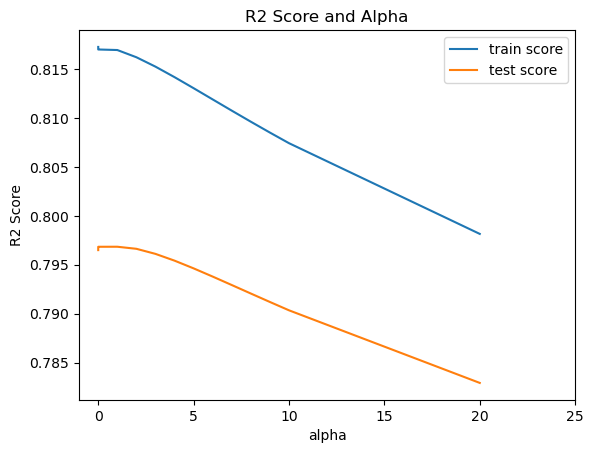

The optimum alpha is 1
The R2 Score of the model on the test dataset for optimum alpha is 0.8129923384600902
The MSE of the model on the test dataset for optimum alpha is 1203718110.7555497


In [124]:

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

X_test_new = x_test[['OverallQual', '1stFlrSF', '2ndFlrSF', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Exterior1st_BrkFace', 'Exterior2nd_Stucco', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_No', 'BsmtQual_TA', 'BsmtExposure_Gd',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'MSSubClass_160']]

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_new, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
ridge_final = Ridge(alpha=alpha)
ridge_final.fit(X_train_new,y_train)
ridge_coef = ridge_final.coef_
y_test_pred = ridge_final.predict(X_test_new)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

#### Lasso Regression

Fitting 11 folds for each of 11 candidates, totalling 121 fits


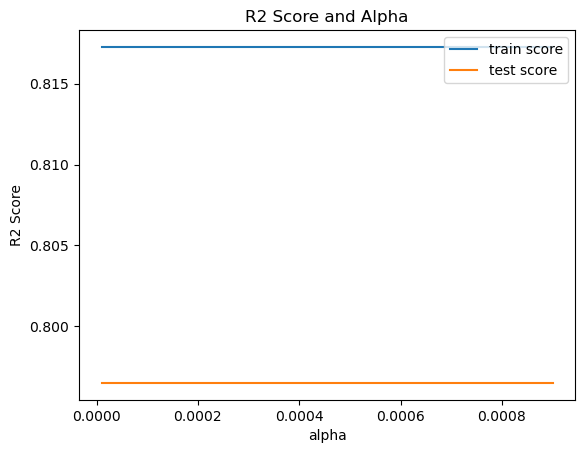

The optimum alpha is 0.0009
The R2 Score of the model on the test dataset for optimum alpha is 0.8133335228553169
The MSE of the model on the test dataset for optimum alpha is 1201521998.402399


In [126]:
# Builsing a Lasso Model with GridSearch CV to find the optimum alpha
params = {'alpha': [0.00001, 0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009 ]}
lasso = Lasso(random_state=100)

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_new, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
lasso_final2 = Lasso(alpha=alpha,random_state=100)
lasso_final2.fit(X_train_new,y_train)
lasso_coef2 = lasso_final2.coef_
y_test_pred = lasso_final2.predict(X_test_new)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))